In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_path = 'data/train'
valid_path = 'data/valid'
test_path = 'data/test'

In [3]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 12600 images belonging to 2 classes.
Found 1400 images belonging to 2 classes.
Found 3120 images belonging to 2 classes.


In [114]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [115]:
x = mobile.layers[-1].output

In [116]:
output = Dense(units=2, activation='softmax')(x)

In [117]:
model = Model(inputs=mobile.input, outputs=output)

In [118]:
for layer in model.layers[:-5]:
    layer.trainable = False

### compile

In [119]:
model.compile(
      optimizer=Adam(learning_rate=0.0001)
    , loss='categorical_crossentropy'
    , metrics=['accuracy']
)

In [120]:
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                   

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [ ]:
model.fit(
      x=train_batches
    , steps_per_epoch=len(train_batches)
    , validation_data=valid_batches
    , validation_steps=len(valid_batches)
    , epochs=10
    , verbose=1
)

Epoch 1/10
1260/1260 [==============================] - 336s 265ms/step - loss: 0.6701 - accuracy: 0.6466 - val_loss: 0.6596 - val_accuracy: 0.6493
Epoch 2/10
1260/1260 [==============================] - 326s 259ms/step - loss: 0.6348 - accuracy: 0.7025 - val_loss: 0.6467 - val_accuracy: 0.6586
Epoch 3/10
1260/1260 [==============================] - 320s 254ms/step - loss: 0.6126 - accuracy: 0.7221 - val_loss: 0.6394 - val_accuracy: 0.6514
Epoch 4/10
1260/1260 [==============================] - 322s 256ms/step - loss: 0.5930 - accuracy: 0.7337 - val_loss: 0.6341 - val_accuracy: 0.6529
Epoch 5/10
1260/1260 [==============================] - 325s 258ms/step - loss: 0.5744 - accuracy: 0.7475 - val_loss: 0.6326 - val_accuracy: 0.6407
Epoch 6/10
1260/1260 [==============================] - 325s 258ms/step - loss: 0.5566 - accuracy: 0.7588 - val_loss: 0.6323 - val_accuracy: 0.6436
Epoch 7/10
1260/1260 [==============================] - 325s 258ms/step - loss: 0.5401 - accuracy: 0.7662 - val_

#### using model

In [4]:
model = load_model('my_model.h5')

In [5]:
test_labels = test_batches.classes

In [6]:
test_labels

array([0, 0, 0, ..., 1, 1, 1])

In [7]:
test_batches.class_indices

{'fight': 0, 'nofight': 1}

In [ ]:
https://deeplizard.com/learn/video/-0Blng0Ww8c

By calling class_indices on test_batches, we can see the mapping from the underlying class names, cat and dog, to the 0s and 1s. The output of test_batches.class_indices looks like this.

{'cat': 0, 'dog': 1}

In [8]:
predictions = model.predict(x=test_batches, verbose=1)

312/312 [==============================] - 69s 218ms/step


In [ ]:
model.save('my_model.h5')

In [9]:
predictions

array([[0.6232208 , 0.37677917],
       [0.59140617, 0.40859386],
       [0.70654976, 0.29345027],
       ...,
       [0.63855654, 0.36144346],
       [0.7539651 , 0.24603492],
       [0.68521774, 0.3147823 ]], dtype=float32)

In [10]:
def plot_confusion_matrix(cm, classes,
        normalize=False,
        title='Confusion matrix',
        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

In [11]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [12]:
cm_plot_labels = ['fight','nofight']

Confusion matrix, without normalization
[[1396  547]
 [ 690  487]]


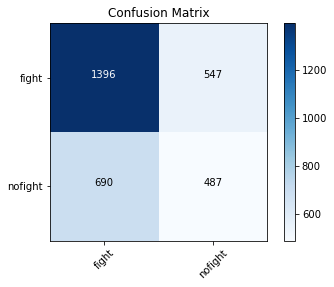

In [13]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [18]:
import cv2 as cv

In [31]:
img = cv.imread('data/test/fight/fi7046.png')
img_arr = np.resize(img, (224, 224, 3))
img_arr = np.expand_dims(img_arr, axis=0)

In [34]:
img_arr.shape

(1, 224, 224, 3)

In [36]:
# img = cv.imread('data/test/fight/fi7046.png')
model.predict(img_arr)

array([[0.5623472 , 0.43765286]], dtype=float32)